# WEEK 7 : Data Visualization

## 1. 그래프 그리기 (Plot Function)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# 난수 10개를 생성한 후 누적합을 구하여 그래프로 나타냅니다.
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
# print s
s.plot() # 그래프 출력
# plt.sho() 파이참에서 사용할 때는 plt.show() 함수를 실행해야 합니다.


# column의 이름을 기준으로 그래프 4개를 하나의 프레임에 나타냅니다.
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

# xticks : x축에 새길 값, yticks
df.plot(xticks = [0, 20, 40, 60, 80, 100])
# xlim : x축 최소/최대 값, ylim
df.plot(xticks = [0, 20, 40, 60, 80, 100], xlim=[0, 200])

# 	right
# 	center left
# 	upper right
# 	lower right
# 	best
# 	center
# 	lower left
# 	center right
# 	upper left
# 	upper center
# 	lower center

# 범례 위치 표시
plt.legend(loc='best')

# plt.show() # pyCharm에서 보고 싶으면 plt.show() 명령어가 필요합니다.

### 랜덤 데이터 생성 후 그래프 그리기

In [ ]:
import random

# how_many 만큼 start, end 범위에 있는 숫자들을 중복하여 추출합니다.
def get_random_numbers(start, end, how_many):
    return [random.randint(start, end) for i in range(how_many)]

x = range(1,13)
y1 = get_random_numbers(0,100,12)
y2 = get_random_numbers(0,100,12)

plt.plot(x,y1,label='Seoul')
plt.plot(x,y2,label='Busan')

# 그래프 타이틀
plt.title('Criminals')
# x축 이름
plt.xlabel('Month')
# y축 이름
plt.ylabel('Number of Criminals')
plt.legend(loc='best')
plt.xlim([1,12])

# 그래프 이미지로 저장하기
plt.savefig('criminal2015.png')

### plot 색깔 및 속성 지정

In [ ]:
# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot
# 색깔 코드 뽑기: http://www.colorpicker.com/
# x값, y값, 선모양, 선 색깔
plt.plot(x,y1,'s-',label='Seoul',color='#00a0c6')
plt.plot(x,y2,'^--',label='Busan',color='#FF8A00')

# margin을 정해줍니다.
plot_x_margin = 1
plot_y_margin = 10

print plt.axis()

# 각 경계선 값
xl, xr, yl, yr = plt.axis()

# 경계선 값에 여백 +/-
plt.axis((xl - plot_x_margin,
          xr + plot_x_margin,
          yl - plot_y_margin,
          yr + plot_y_margin))

# spine 지우기
ax = plt.subplot(111)    # nrows / ncols / plot_num
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

# tick 지우기
plt.tick_params(bottom="on", top="off", left="on", right="off",
                labelbottom="on", labelleft="on")

plt.grid()


# 2. 데이터 실습

In [1]:
#-*- coding: utf-8 -*-
import pandas as pd
from datetime import datetime

earthquake = pd.read_table('./earthquake_preparation.txt', sep=',', encoding = 'utf-8')

def string_to_datetime(string) :
    return datetime.strptime(string, '%Y-%m-%d')

# TXT 파일을 읽어왔기 때문에 '진원시' 열을 다시 datetime 형식으로 바꿔주어야 합니다.
earthquake[u'진원시'] = earthquake[u'진원시'].apply(string_to_datetime)
earthquake.head()

,진원시,규모,위도,경도,위치,강도,지역
0,2016-07-09,2.6,38.69,125.83,북한 황해북도 송림 동남동쪽 18km 지역,minor,북한
1,2016-07-09,2.3,35.48,129.97,울산 동구 동쪽 50km 해역,minor,울산
2,2016-07-05,2.6,35.51,129.87,울산 동구 동쪽 41km 해역,minor,울산
3,2016-07-05,5.0,35.51,129.99,울산 동구 동쪽 52km 해역,moderate,울산
4,2016-06-25,2.6,38.74,125.86,북한 황해북도 송림 동쪽 20km 지역,minor,북한


Current size: [6.0, 4.0]


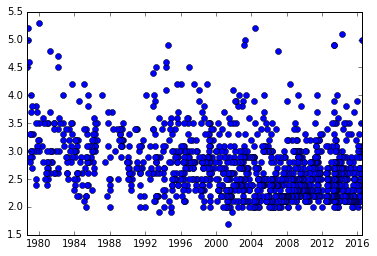

In [2]:
import matplotlib.pyplot as plt

# ipython notebook 에서 그래프를 출력하기 위해서 필요한 옵션입니다.
%matplotlib inline

# x축의 내용이 시간일 때 특별히 사용할 수 있는 plot_date 함수입니다.
plt.plot_date(earthquake[u'진원시'], earthquake[u'규모'], xdate=True)


# 그래프 크기 바꾸기
# Get current size
fig_size = plt.rcParams["figure.figsize"]
print "Current size:", fig_size
 
fig_size[0] = 15 # 가로길이
fig_size[1] = 10 # 세로길이

plt.show()

진원시
1978     6
1979    22
1980    16
1981    15
1982    13
1983    20
1984    19
1985    26
1986    15
1987    11
1988     6
1989    16
1990    15
1991    19
1992    15
1993    23
1994    25
1995    29
1996    39
1997    21
1998    32
1999    37
2000    29
2001    43
2002    49
2003    38
2004    41
2005    37
2006    50
2007    42
2008    46
2009    60
2010    42
2011    52
2012    29
2013    93
2014    49
2015    44
2016    38
dtype: int64


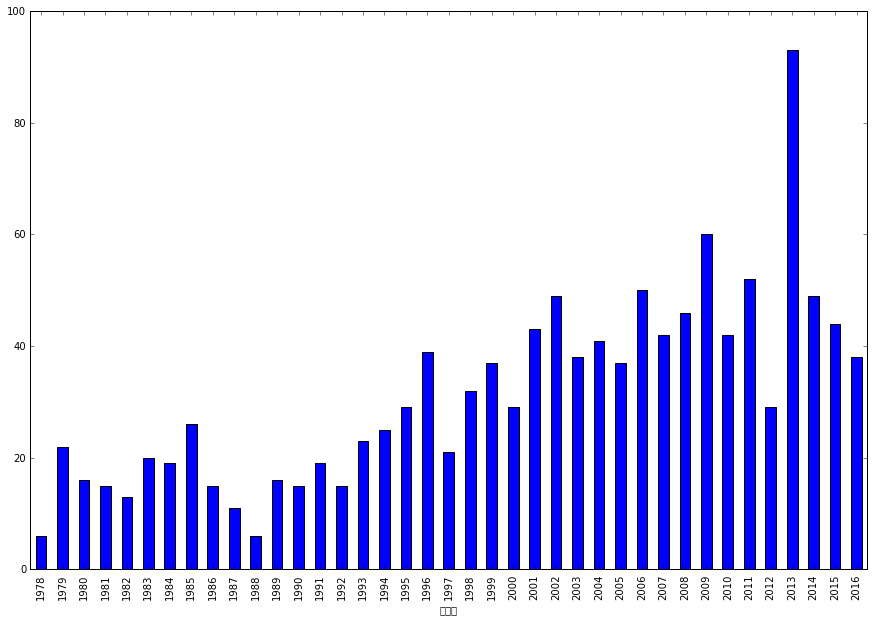

In [3]:
# 연도별 지진 발생 횟수
# 진원시의 각 요소(0~1223)에서 year만 뽑아와서 새로운 Series 만들기
year = earthquake[u'진원시'].apply(lambda x: x.year)
# print year # 진원시 각 행의 날짜에서 year만 추출한 Series

# groupby 함수를 사용해서 earthquake DataFrame을 year를 기준으로 그룹화
eq_group = earthquake.groupby(year)

# for문을 돌면서 각 group 이름(group)과 이에 속한 행 데이터(data)를 출력
# for group, data in eq_group :
#     print group
#     print data

# 연도별 지진 발생 횟수를 그래프로 그리고자 하였기 때문에
# 그룹화 되어 있는 연도 그룹의 사이즈를 구합니다.
eq_times = eq_group.size()
print eq_times

# eq_times라는 데이터로 그래프를 그리고, 종류는 막대그래프로 선택합니다.
# default는 선그래프
eq_times.plot(kind='bar')

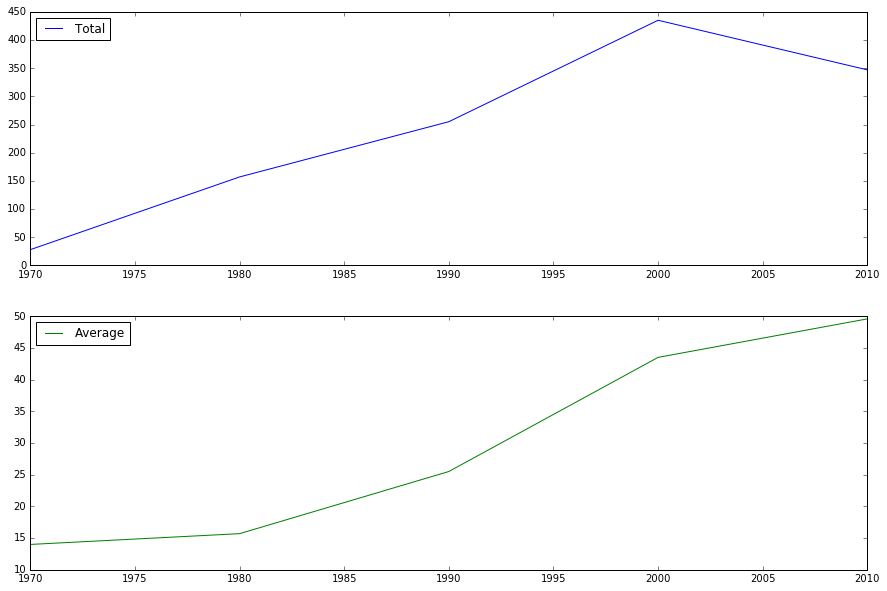

In [4]:
# 새로운 레이어를 하나 만들고
fig1 = plt.figure()

# 해당 레이어에 2행 X 1열의 sub레이어를 만들고 그 중 첫번째 레이어(ax1)에 그래프를 그리려고 합니다.
ax1 = fig1.add_subplot(2, 1, 1)

# Decade 총 발생 횟수
# 1978 -> 1970, 1983 -> 1980 처럼 해당 연도를 19XX 년대 형식으로 바꾸기 위해서 연산합니다.
decade = earthquake[u'진원시'].map(lambda x: x.year / 10 * 10) # e.g. 1978 / 10 * 10 = 1970 

# 마찬가지로 10년간의 데이터를 합산해봅니다.
dc_times = earthquake.groupby(decade).size()

# 전체 발생 횟수를 그래프로 나타냅니다.
ax1.plot(dc_times, label = 'Total', color = 'blue')


# Decade 평균 값을 계산해봅시다.
avg = pd.Series() # 먼저 빈 Series를 만들고, 거기에 차근차근 하나씩 append 해봅시다.

for dc, size in dc_times.iteritems(): # group.size를 for문 돌릴 때 iteritems 함수를 사용합니다.
    if dc == 1970 : # 1970년대에는 78, 79년 2년 밖에 없어서
        avg = avg.append(pd.Series(size/2.0, index=[dc])) # 나누기 2를
    elif dc == 2010 : # 2010년대에는 10 ~ 16년 7년이기 때문에
        avg = avg.append(pd.Series(size/7.0, index=[dc])) # 나누기 7을
    else :
        avg = avg.append(pd.Series(size/10.0, index=[dc]))

# 좀 전에 만들어 놓은 2 X 1 레이어의 2번째 자리(ax2)에 평균 데이터 그래프를 그립니다.
ax2 = fig1.add_subplot(2, 1, 2)        
ax2.plot(avg, label = 'Average', color = 'green')
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')

### Box Plot

    1978  1979  1980  1981  1982  1983  1984  1985  1986  1987  ...   2007  \
0    3.3   3.2   2.8   3.0   3.1   3.0   2.6   2.3   3.5   2.4  ...    2.7   
1    2.8   3.0   2.7   2.6   3.2   2.3   2.4   3.0   3.2   2.3  ...    2.6   
2    4.6   3.5   2.5   3.4   3.5   2.5   2.9   3.2   3.1   2.5  ...    2.2   
3    5.0   3.2   2.8   3.5   3.3   3.5   2.8   3.1   3.1   2.0  ...    2.1   
4    5.2   3.7   2.4   2.6   4.0   3.3   3.9   2.9   3.0   2.5  ...    2.5   
5    4.5   3.1   3.0   3.5   3.5   2.9   2.2   3.1   3.4   3.7  ...    2.1   
6    NaN   3.0   3.5   2.8   3.0   4.2   2.6   2.8   3.3   3.5  ...    2.9   
7    NaN   3.8   2.7   3.0   3.6   3.5   3.2   2.4   3.5   3.1  ...    2.1   
8    NaN   2.4   2.6   3.0   4.7   2.8   2.6   2.6   2.6   2.2  ...    2.2   
9    NaN   2.5   2.6   2.8   3.4   3.1   2.5   3.8   3.6   2.8  ...    2.5   
10   NaN   3.5   2.5   4.8   2.6   3.0   3.1   2.8   3.2   4.0  ...    2.9   
11   NaN   3.0   3.5   3.7   4.5   3.4   2.2   4.0   2.7   NaN  

C:\Miniconda2\lib\site-packages\ipykernel\__main__.py:36: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


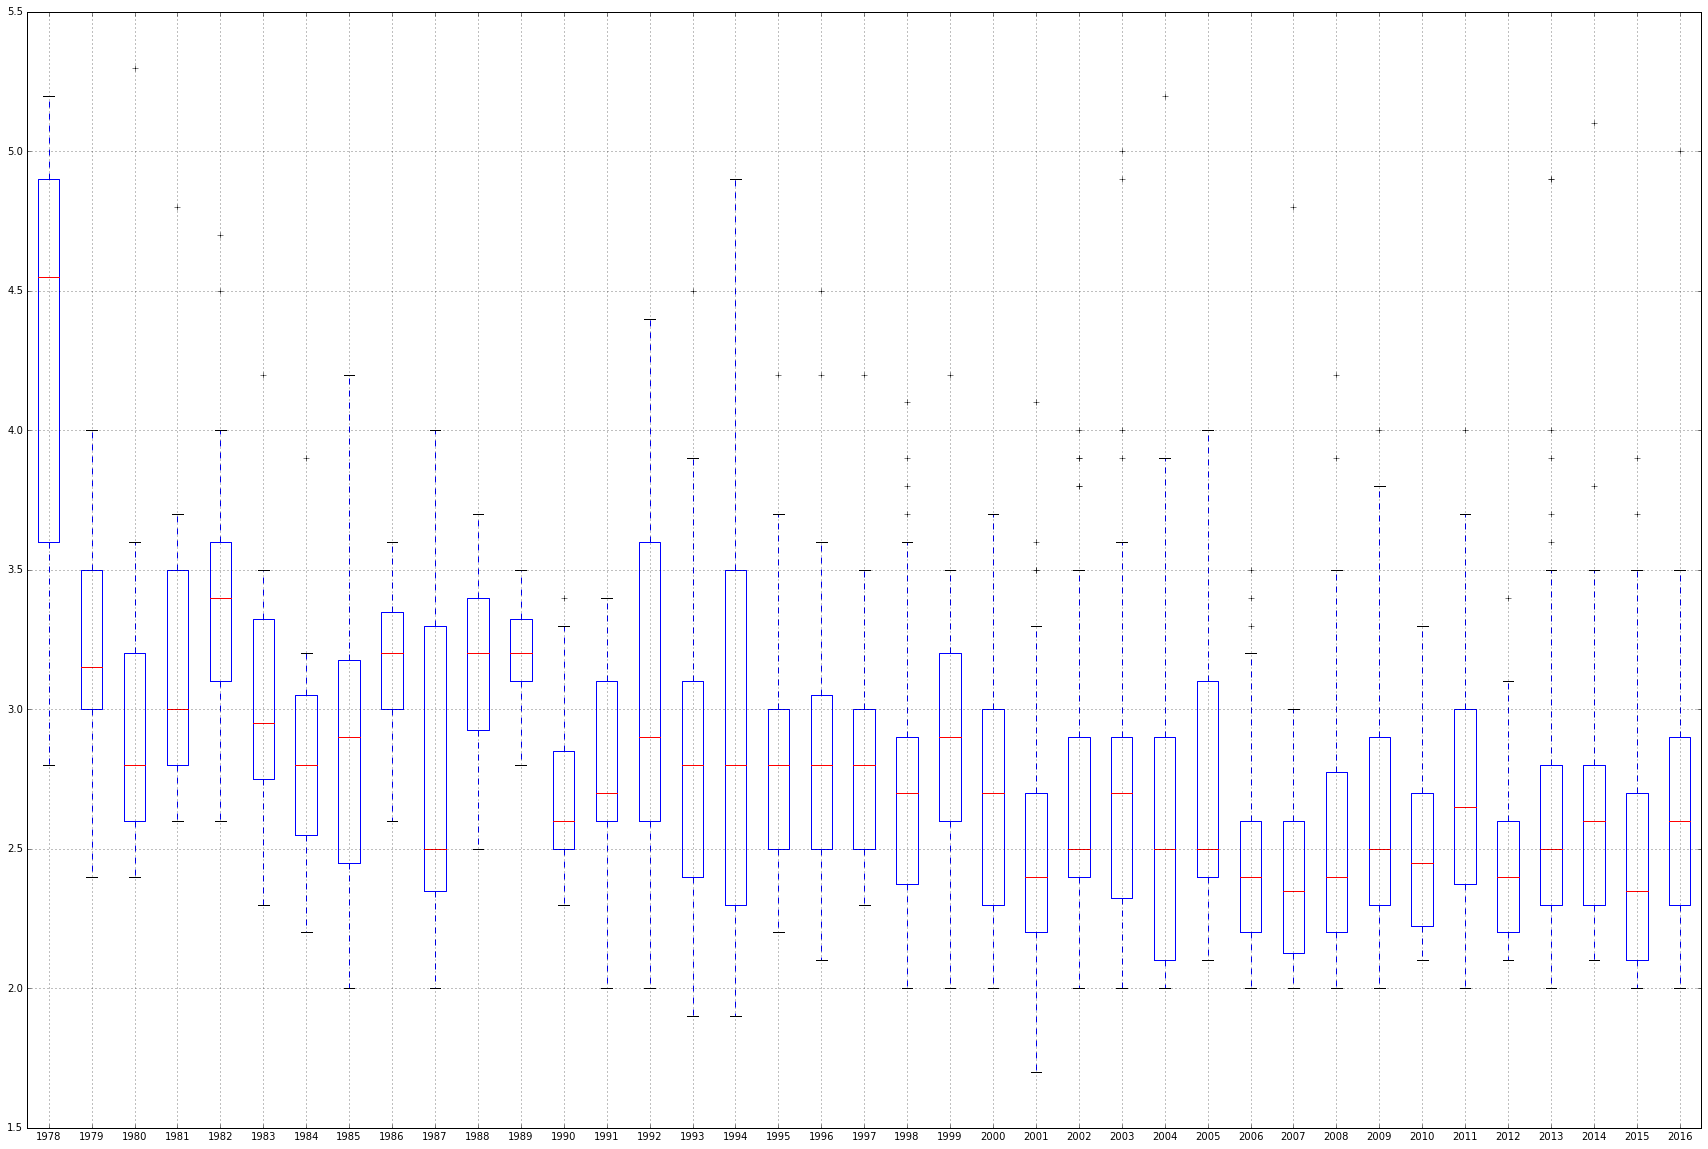

In [11]:
# 시간이 지날수록 지진이 자주 일어나는 것 같은데 
# 실제 더 위험해진 것인지 지진 규모와 함께 판단해 봐야할 것 같습니다.

# 레이어를 새로 만들구요.
fig2 = plt.figure()
ax = fig2.add_subplot(111)

# 연도를 기준으로 그룹핑합니다.
eq_level = earthquake[u'규모'].groupby(year)

# 빈 DataFrame을 만들어줍니다.

df = pd.DataFrame()

for idx, data in eq_level: # for문을 돌면서 그룹이름(idx)과 data를 불러옵니다.
    # 한줄 한줄 읽으면서 DataFrame에 append 합니다.
    df = df.append(pd.Series(data.values), ignore_index=True) 

# 그래프는 column을 기준으로 그려지기 때문에 연도를 column으로 돌리기 위해서
# Transpose 시킵니다.
df = df.transpose()

# column 이름이 비어있죠? 1978 ~ 2016년으로 채워줍니다.
df.columns = range(1978, 2017)

# DataFrame이 우리가 원하는 모양으로 되어있는지 마지막으로 확인합니다.
print df


# 그래프 크기 바꾸기
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 20

# DataFrame을 Boxplot으로 표현합니다.
df.boxplot(meanline=True)

# 이미지로 저장하기
plt.savefig('boxcompare.png')

### 지진 발생 지도에 표시하기

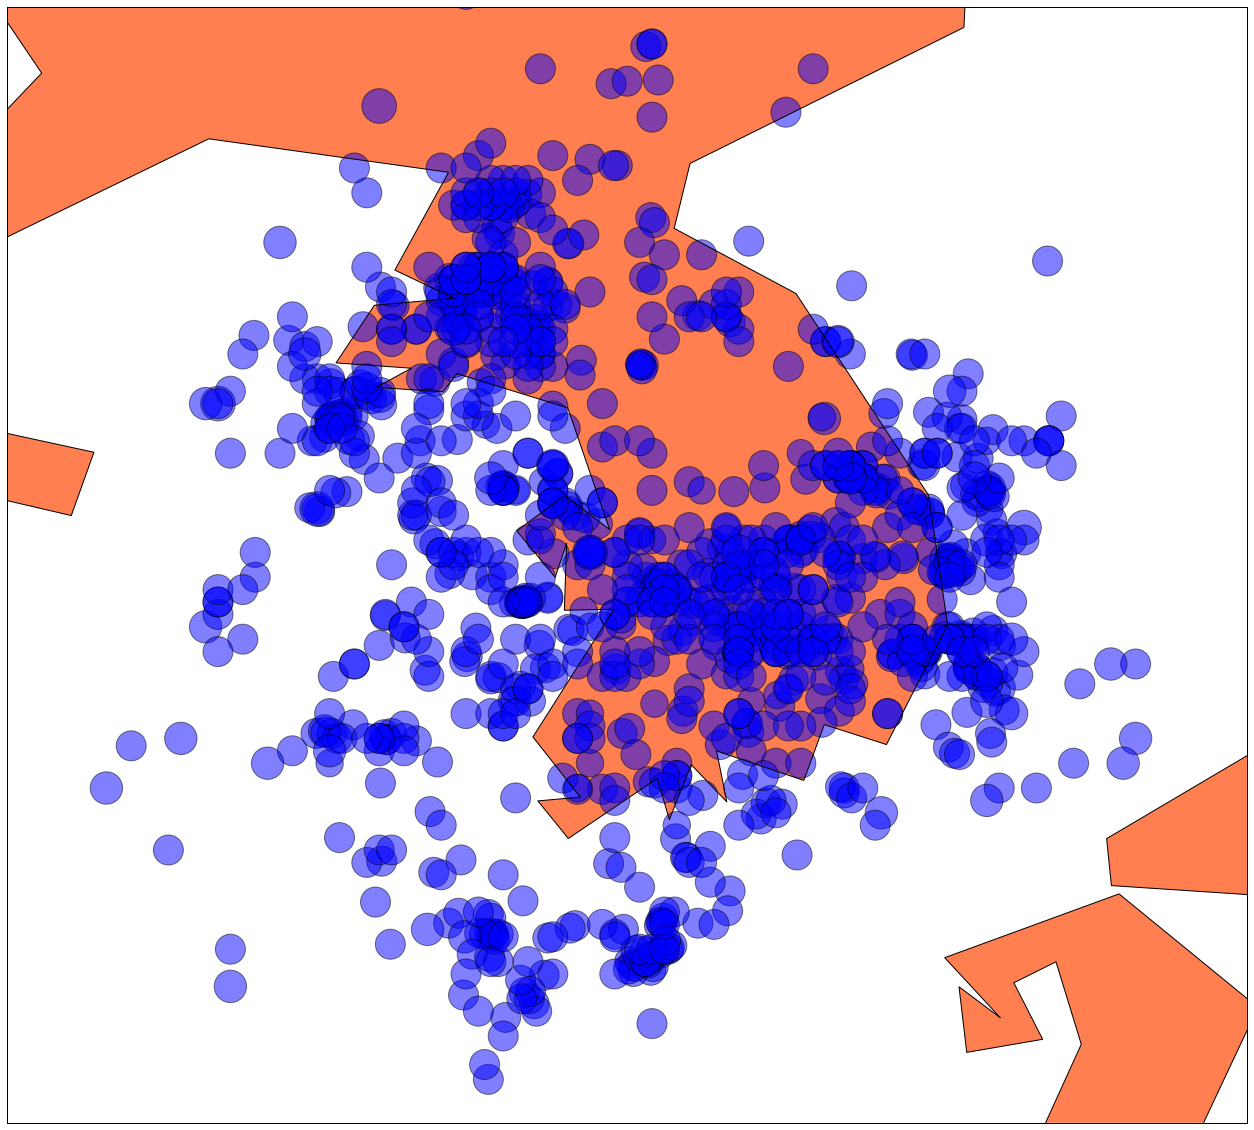

In [23]:
# 사용하기 전에 conda install basemap

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# earthquake[조건] -> 조건 : earthquake[u'위도'] == 0
# earthquake[earthquake[u'위도'] == 0]  => earthquake에서 위도가 0인 값만 선택하기
lats = earthquake[u'위도'].drop(earthquake[earthquake[u'위도'] == 0].index)
lons = earthquake[u'경도'].drop(earthquake[earthquake[u'경도'] == 0].index)
strs = earthquake[u'규모'].round()

earthquake = earthquake.drop(earthquake[earthquake[u'위도'] == 0].index)
# print earthquake
                                        
lats = earthquake[u'위도']
lons = earthquake[u'경도']
strs = earthquake[u'규모']
                                        
"""
2.0 이하 - micro : 지진계가 감지할 수 있는 정도
2.1 ~ 3.9 - minor : 가끔 느끼지만 거의 영향은 없음, 땅이 조금 흔들리는 정도 (여진)
4.0 ~ 4.9 - light : 실내 물건들의 느낄 수 있는 수준의 덜컹거림, 땅이 조금 흔들리는 정도 (여진)
5.0 ~ 5.9 - moderate : 약한 건물들은 피해를 받을 수 있음, 전봇대가 파손되는 정도
6.0 ~ 6.9 - strong : 땅이 뚜렷하게 흔들리고 주택등이 무너지는 정도
7.0 ~ 7.9 - major : 땅이 심하게 흔들리는 정도, 아파트 등 큰 빌딩이 무너지는 정도
8.0 ~ 9.9 - great : 땅이 심하게 흔들리는 정도, 아파트 등 큰 빌딩이 무너지는 정도
10.0 이상 - massive : 한번도 발생한 적 없음
"""

ratio = ['micro', 'minor', 'light', 'moderate', 'strong', 'major', 'great', 'massive']
def strength_to_size(string):
    idx = ratio.index(string)
    return (idx + 5) * 150

def strength_to_color(string) :
    c = ['yellow', 'green', 'blue', 'red', 'red', 'black', 'black', 'black']
    idx = ratio.index(string)
    return c[idx]

# 강도에 따라서 dot size와 색깔 결정하기
size = earthquake[u'강도'].apply(strength_to_size)
colors = earthquake[u'강도'].apply(strength_to_color)

plt.scatter(lats, lons, s = size)
# plt.show()

# http://matplotlib.org/basemap/users/mapsetup.html
# 여러 지도 중에서 cyl를 불러옵니다.
# 위도 / 경도 경계를 지정해주면 지도에서 그 부분만 잘라서 보여줍니다.
m = Basemap(projection='cyl',llcrnrlat=32,urcrnrlat=41, llcrnrlon=122,urcrnrlon=132,resolution='c')
m.drawcoastlines()
# 지도 색깔 정하기
m.fillcontinents(color='coral',lake_color='aqua', zorder=0) #zorder = 0 맨 뒤로 보내기
x, y = m(lons,lats) # 우리가 위에서 준비한 lons / lats Series를 위도/경도로 인식하도록 처리하여 x, y에 넣습니다.
m.scatter(x,y,s=size, marker='o', alpha = 0.5, c='blue')
plt.show()